# Problem Statement

Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates? 

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be easier to use than others.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train_fNxu4vz.csv')
test = pd.read_csv('test_fjtUOL8.csv')

In [3]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [5]:
train.shape, test.shape

((164309, 14), (109541, 13))

In [6]:
combine = train.append(test)
combine.shape

C:\Users\hungu\anaconda.x\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(273850, 14)

In [7]:
combine.columns

Index(['Annual_Income', 'Debt_To_Income', 'Gender', 'Home_Owner',
       'Income_Verified', 'Inquiries_Last_6Mo', 'Interest_Rate',
       'Length_Employed', 'Loan_Amount_Requested', 'Loan_ID',
       'Months_Since_Deliquency', 'Number_Open_Accounts', 'Purpose_Of_Loan',
       'Total_Accounts'],
      dtype='object')

In [8]:
combine['Annual_Income'].describe()

count    2.318500e+05
mean     7.339279e+04
std      5.852984e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.900000e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

In [9]:
combine['Annual_Income'] = np.log(combine['Annual_Income'])
combine['Annual_Income'].fillna(combine['Annual_Income'].mean(), inplace=True)
combine['Annual_Income'].describe()

count    273850.000000
mean         11.058225
std           0.479278
min           8.006368
25%          10.791379
50%          11.058225
75%          11.314475
max          15.830414
Name: Annual_Income, dtype: float64

In [10]:
combine['Debt_To_Income'].describe()

count    273850.000000
mean         17.215901
std           7.845967
min           0.000000
25%          11.360000
50%          16.850000
75%          22.780000
max          39.990000
Name: Debt_To_Income, dtype: float64

In [11]:
combine['Debt_To_Income'] = np.log1p(combine['Debt_To_Income'])
combine['Debt_To_Income'].describe()

count    273850.000000
mean          2.783277
std           0.538476
min           0.000000
25%           2.514465
50%           2.882004
75%           3.168845
max           3.713328
Name: Debt_To_Income, dtype: float64

In [12]:
combine['Gender'].value_counts()

Male      194993
Female     78857
Name: Gender, dtype: int64

In [13]:
combine['Home_Owner'].value_counts()

Mortgage    117270
Rent         93542
Own          20879
Other           79
None            20
Name: Home_Owner, dtype: int64

In [14]:
combine['Home_Owner'].fillna('Unknown', inplace=True)
combine['Home_Owner'].value_counts()

Mortgage    117270
Rent         93542
Unknown      42060
Own          20879
Other           79
None            20
Name: Home_Owner, dtype: int64

In [15]:
combine['Income_Verified'].value_counts()

VERIFIED - income           99076
VERIFIED - income source    88253
not verified                86521
Name: Income_Verified, dtype: int64

In [16]:
combine['Income_Verified'] = combine['Income_Verified'].replace('VERIFIED - income', 'Verf_inc')
combine['Income_Verified'] = combine['Income_Verified'].replace('VERIFIED - income source', 'Verf_inc_src')
combine['Income_Verified'] = combine['Income_Verified'].replace('not verified', 'Not_verf')
combine['Income_Verified'].value_counts()

Verf_inc        99076
Verf_inc_src    88253
Not_verf        86521
Name: Income_Verified, dtype: int64

In [17]:
combine['Inquiries_Last_6Mo'].value_counts()

0    142486
1     76791
2     34006
3     14829
4      3779
5      1363
6       556
7        30
8        10
Name: Inquiries_Last_6Mo, dtype: int64

In [18]:
combine['Length_Employed'].value_counts()

10+ years    88328
2 years      24420
3 years      21478
< 1 year     21133
5 years      18042
1 year       17336
4 years      16393
7 years      15444
6 years      15351
8 years      13115
9 years      10503
Name: Length_Employed, dtype: int64

In [19]:
combine['Length_Employed'] = combine['Length_Employed'].replace('10+ years', 10)
combine['Length_Employed'] = combine['Length_Employed'].replace('2 years', 2)
combine['Length_Employed'] = combine['Length_Employed'].replace('3 years', 3)
combine['Length_Employed'] = combine['Length_Employed'].replace('< 1 year', 0)
combine['Length_Employed'] = combine['Length_Employed'].replace('5 years', 5)
combine['Length_Employed'] = combine['Length_Employed'].replace('1 year', 1)
combine['Length_Employed'] = combine['Length_Employed'].replace('4 years', 4)
combine['Length_Employed'] = combine['Length_Employed'].replace('7 years', 7)
combine['Length_Employed'] = combine['Length_Employed'].replace('6 years', 6)
combine['Length_Employed'] = combine['Length_Employed'].replace('8 years', 8)
combine['Length_Employed'] = combine['Length_Employed'].replace('9 years', 9)
combine['Length_Employed'].fillna(-1, inplace=True)
combine['Length_Employed'] = combine['Length_Employed'].astype('int')
combine['Length_Employed'].value_counts()

 10    88328
 2     24420
 3     21478
 0     21133
 5     18042
 1     17336
 4     16393
 7     15444
 6     15351
 8     13115
-1     12307
 9     10503
Name: Length_Employed, dtype: int64

In [20]:
combine['Loan_Amount_Requested'] = combine['Loan_Amount_Requested'].str.replace(',','').astype('int')
combine['Loan_Amount_Requested'].describe()

count    273850.000000
mean      14352.992240
std        8289.036702
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: Loan_Amount_Requested, dtype: float64

In [21]:
combine['Loan_Amount_Requested'] = np.log(combine['Loan_Amount_Requested'])
combine['Loan_Amount_Requested'].describe()

count    273850.000000
mean          9.379342
std           0.668087
min           6.214608
25%           8.987197
50%           9.392662
75%           9.903488
max          10.463103
Name: Loan_Amount_Requested, dtype: float64

In [22]:
combine['Months_Since_Deliquency'].describe()

count    126612.000000
mean         34.103395
std          21.750307
min           0.000000
25%          16.000000
50%          31.000000
75%          49.000000
max         180.000000
Name: Months_Since_Deliquency, dtype: float64

In [23]:
combine['Months_Since_Deliquency'].fillna(-1, inplace=True)
bins= [-1, 0, 30, 60, 182]
labels = ['Unknown', 'Month_1', 'Month_2', 'Month_3Plus']
combine['Months_Since_Deliquency'] = pd.cut(combine['Months_Since_Deliquency'], bins=bins, labels=labels, right=False)
combine['Months_Since_Deliquency'].value_counts()

Unknown        147238
Month_1         60733
Month_2         45346
Month_3Plus     20533
Name: Months_Since_Deliquency, dtype: int64

In [24]:
combine['Number_Open_Accounts'].describe()

count    273850.000000
mean         11.186025
std           4.973663
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: Number_Open_Accounts, dtype: float64

In [25]:
bins= [0, 10, 20, 86]
labels = ['Acc_Tier_1', 'Acc_Tier_2', 'Acc_Tier_3']
combine['Number_Open_Accounts'] = pd.cut(combine['Number_Open_Accounts'], bins=bins, labels=labels, right=False)
combine['Number_Open_Accounts'].value_counts()

Acc_Tier_2    141494
Acc_Tier_1    115026
Acc_Tier_3     17330
Name: Number_Open_Accounts, dtype: int64

In [26]:
combine['Purpose_Of_Loan'].value_counts()

debt_consolidation    161403
credit_card            61394
home_improvement       15455
other                  13846
major_purchase          5712
small_business          4064
car                     3149
medical                 2633
moving                  1675
vacation                1453
wedding                 1345
house                   1316
renewable_energy         206
educational              199
Name: Purpose_Of_Loan, dtype: int64

In [27]:
combine['Total_Accounts'].describe()

count    273850.000000
mean         25.067975
std          11.589677
min           2.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: Total_Accounts, dtype: float64

In [28]:
bins= [2, 12, 22, 32, 159]
labels = ['Tot_Acc_1', 'Tot_Acc_2', 'Tot_Acc_3', 'Tot_Acc_4']
combine['Total_Accounts'] = pd.cut(combine['Total_Accounts'], bins=bins, labels=labels, right=False)
combine['Total_Accounts'].value_counts()

Tot_Acc_2    89999
Tot_Acc_3    86312
Tot_Acc_4    70338
Tot_Acc_1    27201
Name: Total_Accounts, dtype: int64

In [29]:
combine.isnull().sum()

Annual_Income                   0
Debt_To_Income                  0
Gender                          0
Home_Owner                      0
Income_Verified                 0
Inquiries_Last_6Mo              0
Interest_Rate              109541
Length_Employed                 0
Loan_Amount_Requested           0
Loan_ID                         0
Months_Since_Deliquency         0
Number_Open_Accounts            0
Purpose_Of_Loan                 0
Total_Accounts                  0
dtype: int64

In [30]:
combine.dtypes

Annual_Income               float64
Debt_To_Income              float64
Gender                       object
Home_Owner                   object
Income_Verified              object
Inquiries_Last_6Mo            int64
Interest_Rate               float64
Length_Employed               int32
Loan_Amount_Requested       float64
Loan_ID                       int64
Months_Since_Deliquency    category
Number_Open_Accounts       category
Purpose_Of_Loan              object
Total_Accounts             category
dtype: object

In [31]:
train_cleaned = combine[combine['Interest_Rate'].isnull()!=True].drop(['Loan_ID'], axis=1)
train_cleaned.head()

,Annual_Income,Debt_To_Income,Gender,Home_Owner,Income_Verified,Inquiries_Last_6Mo,Interest_Rate,Length_Employed,Loan_Amount_Requested,Months_Since_Deliquency,Number_Open_Accounts,Purpose_Of_Loan,Total_Accounts
0,11.127263,2.963725,Female,Rent,Not_verf,0,1.0,0,8.853665,Unknown,Acc_Tier_1,car,Tot_Acc_2
1,11.058225,2.768204,Female,Mortgage,Verf_inc,0,3.0,4,10.308953,Month_1,Acc_Tier_2,debt_consolidation,Tot_Acc_3
2,11.232767,2.826129,Male,Mortgage,Verf_inc_src,0,3.0,7,10.115570,Unknown,Acc_Tier_2,debt_consolidation,Tot_Acc_2
3,10.935960,2.730464,Male,Unknown,Verf_inc_src,3,3.0,0,9.680344,Unknown,Acc_Tier_2,debt_consolidation,Tot_Acc_3
4,11.472103,3.142858,Female,Own,Verf_inc_src,1,1.0,8,9.740969,Unknown,Acc_Tier_2,debt_consolidation,Tot_Acc_3


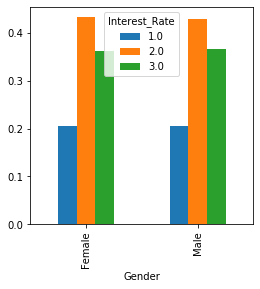

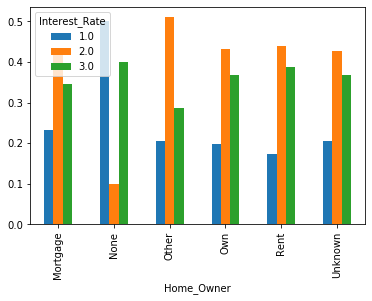

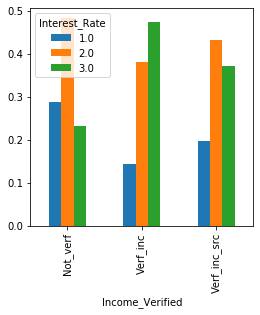

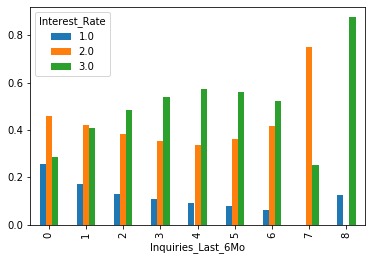

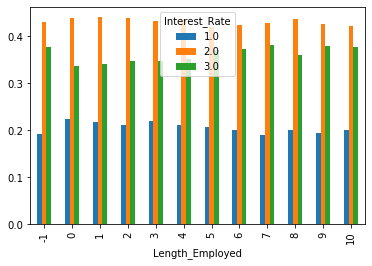

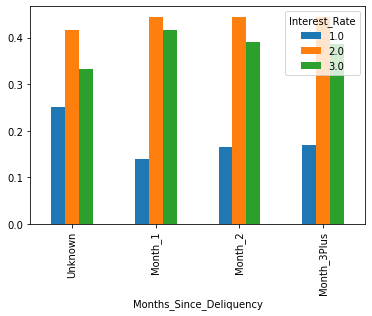

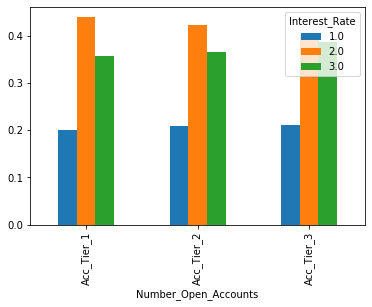

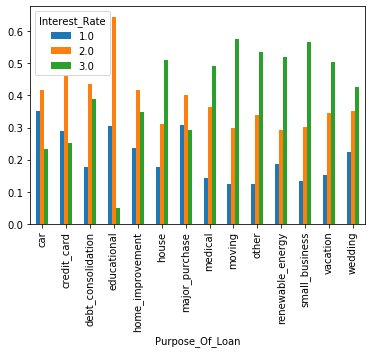

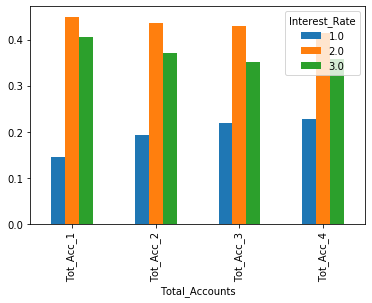

In [32]:
Gender = pd.crosstab(train_cleaned['Gender'], train_cleaned['Interest_Rate'])
Home_Owner = pd.crosstab(train_cleaned['Home_Owner'], train_cleaned['Interest_Rate'])
Income_Verified = pd.crosstab(train_cleaned['Income_Verified'], train_cleaned['Interest_Rate'])
Inquiries_Last_6Mo = pd.crosstab(train_cleaned['Inquiries_Last_6Mo'], train_cleaned['Interest_Rate'])
Length_Employed = pd.crosstab(train_cleaned['Length_Employed'], train_cleaned['Interest_Rate'])
Months_Since_Deliquency = pd.crosstab(train_cleaned['Months_Since_Deliquency'], train_cleaned['Interest_Rate'])
Number_Open_Accounts = pd.crosstab(train_cleaned['Number_Open_Accounts'], train_cleaned['Interest_Rate'])
Purpose_Of_Loan = pd.crosstab(train_cleaned['Purpose_Of_Loan'], train_cleaned['Interest_Rate'])
Total_Accounts = pd.crosstab(train_cleaned['Total_Accounts'], train_cleaned['Interest_Rate'])


Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
Home_Owner.div(Home_Owner.sum(1).astype(float), axis=0).plot(kind="bar")
Income_Verified.div(Income_Verified.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
Inquiries_Last_6Mo.div(Inquiries_Last_6Mo.sum(1).astype(float), axis=0).plot(kind="bar")
Length_Employed.div(Length_Employed.sum(1).astype(float), axis=0).plot(kind="bar")
Months_Since_Deliquency.div(Months_Since_Deliquency.sum(1).astype(float), axis=0).plot(kind="bar")
Number_Open_Accounts.div(Number_Open_Accounts.sum(1).astype(float), axis=0).plot(kind="bar")
Purpose_Of_Loan.div(Purpose_Of_Loan.sum(1).astype(float), axis=0).plot(kind="bar")
Total_Accounts.div(Total_Accounts.sum(1).astype(float), axis=0).plot(kind="bar")

plt.show()

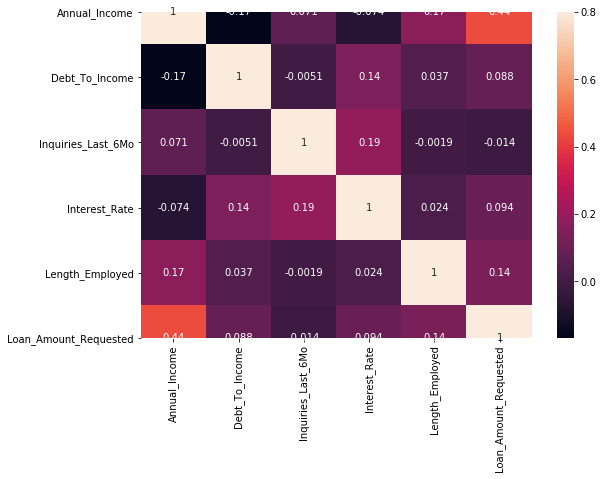

In [33]:
matrix = train_cleaned.corr() 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, annot=True)

In [34]:
combine = pd.get_dummies(combine)
combine.shape

(273850, 43)

In [35]:
X = combine[combine['Interest_Rate'].isnull()!=True].drop(['Loan_ID','Interest_Rate'], axis=1)
y = combine[combine['Interest_Rate'].isnull()!=True]['Interest_Rate']

X_test = combine[combine['Interest_Rate'].isnull()==True].drop(['Loan_ID','Interest_Rate'], axis=1)

X.shape, y.shape, X_test.shape

((164309, 41), (164309,), (109541, 41))

In [36]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.5,
    'boost': 'gbdt',
    'feature_fraction': 0.7,
    'learning_rate': 0.005,
    'num_class':4,
    'metric':'multi_logloss',
    'max_depth': 8,  
    'num_leaves': 70,
    'min_data_in_leaf':40,
    'objective': 'multiclass',
    'scale_pos_weight':1,
    'verbosity': 1
}

In [37]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score

features = X.columns

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1048)

pred_test = np.zeros((len(X_test), 4))

feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X.values, y.values)):
    print("Fold {}".format(fold_))
    train_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[val_idx], label=y.iloc[val_idx])

    num_round = 1000000
    classifier = lgb.train(param, train_data, num_round, valid_sets = [train_data, val_data], 
                    verbose_eval=1000, early_stopping_rounds = 1000)
    pred_y = np.argmax(classifier.predict(X.iloc[val_idx], num_iteration=classifier.best_iteration), axis=1)
    
    print("CV score: ", f1_score(pred_y, y.iloc[val_idx], average='weighted'))
    print(confusion_matrix(pred_y, y.iloc[val_idx]))
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = classifier.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    pred_test += classifier.predict(X_test, num_iteration=classifier.best_iteration) / folds.n_splits

Fold 0
Training until validation scores don't improve for 1000 rounds.
[1000]	training's multi_logloss: 0.91574	valid_1's multi_logloss: 0.933264
[2000]	training's multi_logloss: 0.891854	valid_1's multi_logloss: 0.92395
[3000]	training's multi_logloss: 0.875851	valid_1's multi_logloss: 0.921566
[4000]	training's multi_logloss: 0.862144	valid_1's multi_logloss: 0.920971
[5000]	training's multi_logloss: 0.849706	valid_1's multi_logloss: 0.921113
Early stopping, best iteration is:
[4450]	training's multi_logloss: 0.856398	valid_1's multi_logloss: 0.920905
CV score: 0.55479 
[[1852 1243  371]
 [4059 9040 4610]
 [ 851 3833 7004]]
Fold 1
Training until validation scores don't improve for 1000 rounds.
[1000]	training's multi_logloss: 0.915441	valid_1's multi_logloss: 0.933128
[2000]	training's multi_logloss: 0.891976	valid_1's multi_logloss: 0.923753
[3000]	training's multi_logloss: 0.87602	valid_1's multi_logloss: 0.921129
[4000]	training's multi_logloss: 0.86244	valid_1's multi_logloss: 0.

In [38]:
all_feat = feature_importance_df[["Feature",
                                  "importance"]].groupby("Feature").mean().sort_values(by="importance", 
                                                                                           ascending=False)
all_feat.reset_index(inplace=True)
important_feat = list(all_feat['Feature'])
all_feat

,Feature,importance
0,Debt_To_Income,168524.6
1,Loan_Amount_Requested,163737.0
2,Annual_Income,153713.2
3,Length_Employed,66015.6
4,Inquiries_Last_6Mo,39346.0
5,Months_Since_Deliquency_Unknown,20016.2
6,Income_Verified_Verf_inc,15962.2
7,Home_Owner_Rent,15870.2
8,Home_Owner_Mortgage,15449.8
9,Purpose_Of_Loan_debt_consolidation,14613.2


In [39]:
df = X[important_feat]
corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

high_cor = [column for column in upper.columns if any(upper[column] > 0.98)]
print(len(high_cor))
print(high_cor)

1
['Gender_Male']


In [40]:
features = [i for i in important_feat if i not in high_cor]
print(len(features))
print(features)

40
['Debt_To_Income', 'Loan_Amount_Requested', 'Annual_Income', 'Length_Employed', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency_Unknown', 'Income_Verified_Verf_inc', 'Home_Owner_Rent', 'Home_Owner_Mortgage', 'Purpose_Of_Loan_debt_consolidation', 'Income_Verified_Not_verf', 'Total_Accounts_Tot_Acc_2', 'Purpose_Of_Loan_credit_card', 'Total_Accounts_Tot_Acc_4', 'Gender_Female', 'Months_Since_Deliquency_Month_1', 'Income_Verified_Verf_inc_src', 'Number_Open_Accounts_Acc_Tier_1', 'Total_Accounts_Tot_Acc_3', 'Number_Open_Accounts_Acc_Tier_2', 'Total_Accounts_Tot_Acc_1', 'Purpose_Of_Loan_other', 'Months_Since_Deliquency_Month_2', 'Home_Owner_Unknown', 'Home_Owner_Own', 'Number_Open_Accounts_Acc_Tier_3', 'Months_Since_Deliquency_Month_3Plus', 'Purpose_Of_Loan_home_improvement', 'Purpose_Of_Loan_small_business', 'Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_car', 'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving', 'Purpose_Of_Loan_vacation', 'Purpose_Of_Loan_wedding', 'Purpose_Of_Loan_h

In [41]:
p_test = np.argmax(pred_test, axis=1)

In [42]:
submission = pd.DataFrame()
submission['Loan_ID'] = test['Loan_ID']
submission['Interest_Rate'] = p_test.astype('int')
submission.head()

,Loan_ID,Interest_Rate
0,10164310,2
1,10164311,2
2,10164312,3
3,10164313,2
4,10164314,2


In [43]:
submission.to_csv('submission.csv', index=False)
submission['Interest_Rate'].value_counts()

2    59095
3    39183
1    11263
Name: Interest_Rate, dtype: int64